# (2)

# Importando os dados do drive
Aqui é importante manter o arquivo em csv dentro da sua pasta MyDrive, caso contrário não funcionará. 

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
#df = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS_Train.csv', sep = ';')
df = pd.read_csv ('ADPNRAW_Train.csv', sep = ';')
uploaded = files.upload()
#df_test = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS_Test.csv', sep = ';')
df_test = pd.read_csv ('ADPNRAW_Test.csv', sep = ';')

Saving ADPNRAW_Train.csv to ADPNRAW_Train.csv


Saving ADPNRAW_Test.csv to ADPNRAW_Test.csv


# Limpando os dados
Os dados vieram com algumas sujeiras que serão retiradas aqui no pre-processamento

In [ ]:
df = df.dropna()
df = df.replace({',': '.'}, regex=True)
df_test = df.dropna()
df_test = df.replace({',': '.'}, regex=True)
df

# Dividindo Treino/Teste
Como todos os dados estão unidos, criaremos um vetor para Y e uma matrix para X

In [ ]:
y_train = df['y']
df.drop('y', axis = 1, inplace = True)
X_train = df.copy()

# Criação do modelo inicial
Vamos criar um modelo inicial para o pls com os dados disponíveis

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Define PLS object
pls = PLSRegression(n_components=2)

# Fit
pls.fit(X_train, y_train)

PLSRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
 
# Cross-validation
y_train_pred = cross_val_predict(pls, X_train, y_train, cv=10)
 
# Calculate scores
score = r2_score(y_train, y_train_pred)
rmse = (mean_squared_error(y_train, y_train_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  -0.002996770501771051 
RMSE:  3.575333820707537


In [ ]:
# Calculando o erro
erro = float(0)
list_y_pred = list(y_train_pred)
list_y = list(y_train)

for i in range(len(y_train_pred)):
  value1 = float(list_y_pred[i])
  value2 = float(list_y[i])
  erro = erro + ((value1 - value2)**2)
erro = erro**(1/2)
erro

26.028823105612044

# Testando para diferentes números de componentes principais

In [ ]:
from sklearn.model_selection import GridSearchCV                                  # Import grid method

param_grid = [                                                                    # Defining parameters to grid method
    {'n_components': [1, 2, 3, 4, 5, 6, 7]},                    # Defining the first set of parameters
]

grid_search = GridSearchCV( pls, param_grid, cv = 10,                            # Define grid search with randForest and 10 folds
                            scoring = 'neg_mean_squared_error',                   # Using MSE como parâmetro de erro
                            return_train_score = True)

grid_search.fit(X_train, y_train)                                                 # Running the tuning

GridSearchCV(cv=10, estimator=PLSRegression(),
             param_grid=[{'n_components': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_      # Printing the best combination of parameters

{'n_components': 7}

In [ ]:
# Printing the scores of all the combinations
import numpy as np

RMSE = []
X = list(range(1,22+1))
cvres = grid_search.cv_results_                                             # Save all the results in a array
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):   # Getting the mean_score and parameters used from array
  value = np.sqrt(-mean_score)
  RMSE.append(value)
  print(value, params)                                                # Printing the values

3.6061105358272507 {'n_components': 1}
3.5803121999923246 {'n_components': 2}
3.2658366527054676 {'n_components': 3}
3.0947808206019065 {'n_components': 4}
3.0709334135093416 {'n_components': 5}
3.049692894846293 {'n_components': 6}
2.8953479606211054 {'n_components': 7}
2.809092641056702 {'n_components': 8}
2.7598009150528955 {'n_components': 9}
2.7646862360775457 {'n_components': 10}
2.7878632929504437 {'n_components': 11}
2.7998437971758743 {'n_components': 12}
2.7731856322161574 {'n_components': 13}
2.7701895639064835 {'n_components': 14}
2.762194308416188 {'n_components': 15}
2.754147143812844 {'n_components': 16}
2.754236168801435 {'n_components': 17}
2.760714112961774 {'n_components': 18}
2.765177985032408 {'n_components': 19}
2.771403871312871 {'n_components': 20}
2.776194582376294 {'n_components': 21}
2.775821100796961 {'n_components': 22}


Text(0.5, 1.0, 'Elbow Curve')

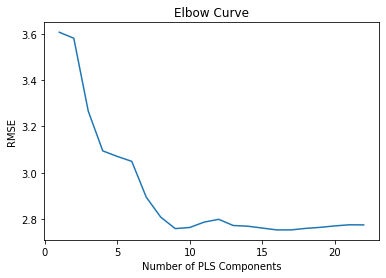

In [ ]:
import matplotlib.pyplot as plt

#plot test RMSE vs. number of components
plt.plot(X, RMSE)
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSE')
plt.title('Elbow Curve')

In [ ]:
df_coef = pd.DataFrame(pls.coef_, columns = ['Coef'])
df_coef.sort_values(['Coef'], ascending = False)
print(df_coef['Coef'].tolist())

[-0.09859853114913084, -0.08847224845883739, -0.01524138983239294, 0.014305323191494013, -0.09845599671919371, -0.06838255415276442, -0.11520649448298885, 0.00583174743933379, 0.17060628041185447, -0.08464037806403908, -0.20030247863671582, -0.07043815772525781, 0.17890631005827368, 0.17630567486575444, 0.08776985337909599, 0.013201481708211784, -0.19357258779638345, -0.03536196740082224, -0.2112024746947896, -0.06127529263070206, -0.07720106015018023, -0.2809525925191639, -0.3021911480204788, 0.044026103355388334, 0.0432983760630223, -0.10905450124683645, -0.029361160390742283, -0.1277619202113107, -0.12128122484354882, -0.005494612810219419, -0.09495554244342685, -0.07598738356453114, -0.007334804474659109, -0.11184437359483422, -0.11530358626038757, -0.09004675599639138, -0.36301561545755223, 0.11014591415336121, 0.13114660834880398, 0.0364066225476858, -0.11954789149603581, -0.34764386337457204, 0.052841553971791994, -0.2273358648257429, 0.11033305038135958, -0.09394344330236462, -

# Rodando o modelo apenas com as variáveis mais importantes

In [ ]:
# Vamos começar testando com as variáveis selecionadas
columns = ['x37', 'x42', 'x95', 'x90', 'x23', 'x22', 'x100', 'x93', 'x55', 'x97', 'x44', 'x68', 'x19', 'x65', 'x11', 'x17', 'x56',
          'x80', 'x13', 'x14', 'x51', 'x75', 'x86', 'x48', 'x9', 'x53', 'x88', 'x96', 'x47', 'x62', 'x39', 'x28', 'x94', 'x78',
          'x52', 'x29', 'x41', 'x35', 'x7', 'x83', 'x34', 'x71', 'x72', 'x45', 'x38', 'x26', 'x61']
X_test = df_test[columns].copy()
y_test = df_test['y']
df_test.drop('y', axis = 1, inplace = True)

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=7)

# Fit
pls.fit(X_test, y_test)

PLSRegression(n_components=7)

In [ ]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.3650234066351892 
RMSE:  2.844760362247192


In [ ]:
# Testar com todas as variáveis
X_test = df_test.copy()

# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.3617446521377248 
RMSE:  2.852095484030116


# Testando um código externo

In [ ]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
 
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
 
    mse = []
    component = np.arange(1, n_comp)
 
    for i in component:
        pls = PLSRegression(n_components=i)
 
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
 
        mse.append(mean_squared_error(y, y_cv))
 
        comp = 100*(i+1)/40
    #     # Trick to update status on the same line
    #     stdout.write("\r%d%% completed" % comp)
    #     stdout.flush()
    # stdout.write("\n")
 
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    # stdout.write("\n")
 
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
 
        plt.show()
 
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
 
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
 
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
 
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
 
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
 
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
 
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
 
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
 
        plt.show()
 
    return

Suggested number of components:  17


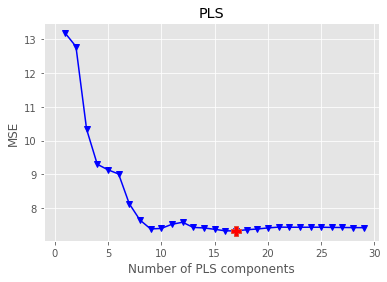

R2 calib: 1.000
R2 CV: 0.425
MSE calib: 0.001
MSE CV: 7.330


TypeError: ignored

In [ ]:
optimise_pls_cv(X_train,y_train, 30, plot_components=True)

# (3) 

In [ ]:
import pandas as pd

uploaded = files.upload()
df_completo = pd.read_csv ('ADPNRAW.csv', sep = ';')
#df_completo = pd.read_csv ('/content/drive/MyDrive/SPIRA_PLS.csv', sep = ';')
df_completo = df_completo.dropna()
df_completo = df_completo.replace({',': '.'}, regex=True)

Saving ADPNRAW.csv to ADPNRAW (1).csv


In [ ]:
# Testando 40/60
from sklearn.model_selection import train_test_split                                # Import the function by sklearn library

data_train, data_test = train_test_split(df_completo, test_size = 0.4, random_state = 42)   # Split the dataframe in train and test
print("The size of train set is: ", len(data_train))                                        # Printing the size of train set
print("The size of test set is:  ", len(data_test))                                         # Printing the size of test set

The size of train set is:  42
The size of test set is:   29


In [ ]:
y_train = data_train['y']
data_train.drop('y', axis = 1, inplace = True)
X_train = data_train.copy()

In [ ]:
y_test = data_test['y']
data_test.drop('y', axis = 1, inplace = True)
X_test = data_test.copy()

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=7)

# Fit
pls.fit(X_train, y_train)

PLSRegression(n_components=7)

In [ ]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.5281090700267007 
RMSE:  3.141983297388542


In [ ]:
# Testando 10/90
from sklearn.model_selection import train_test_split                                # Import the function by sklearn library

data_train, data_test = train_test_split(df_completo, test_size = 0.1, random_state = 42)   # Split the dataframe in train and test
print("The size of train set is: ", len(data_train))                                        # Printing the size of train set
print("The size of test set is:  ", len(data_test))                                         # Printing the size of test set

The size of train set is:  63
The size of test set is:   8


In [ ]:
y_train = data_train['y']
data_train.drop('y', axis = 1, inplace = True)
X_train = data_train.copy()

In [ ]:
y_test = data_test['y']
data_test.drop('y', axis = 1, inplace = True)
X_test = data_test.copy()

In [ ]:
# Define PLS object
pls = PLSRegression(n_components=7)

# Fit
pls.fit(X_train, y_train)

PLSRegression(n_components=7)

In [ ]:
# Cross-validation
y_test_pred = cross_val_predict(pls, X_test, y_test, cv=5)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  -1.0965643761515653 
RMSE:  4.976206894935383


/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 5
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")
/usr/local/lib/python3.7/dist-packages/sklearn/cross_decomposition/_pls.py:305: UserWarning: Y residual is constant at iteration 6
  warnings.warn(f"Y residual is constant at iteration {k}")


# (4) Executando um modelo de regressão linear

In [ ]:
# Vamos rodar de regressão para a porcao 60/40 (será necessário executar as células de atribuição das variáveis 60/40)
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Cross-validation
y_test_pred = cross_val_predict(lin_reg, X_test, y_test, cv=10)
 
# Calculate scores
score = r2_score(y_test, y_test_pred)
rmse = (mean_squared_error(y_test, y_test_pred))**(1/2)
print("R²: ", score, "\nRMSE: ", rmse)

R²:  0.3558315101128474 
RMSE:  3.6709865689413586
